# Visualization using ggplot in the R language

The most important step in this notebook is Data Wrangling to represent data in required format containing only relevant data to visualize. Most common data wrangling operations are given in Table1 below.

The objective of data wrangling is to clean (pre process), structure (change to required table format), and enrichen raw data (selection, and aggregation).

After wrangling, data is visualized by standard plots- bar, pie, histogram, line, and Sankey diagram to draw critical inferences.

**Table1: data wrangling functions in the R language**

| Function | Purpose |
| -------- | ------- |
| filter() | subset by row |
| select() | subset by column |
| arrange() | reorder rows |
| mutate() | add or modify columns |
| group_by() | group columns |

In [1]:
install.packages('tidyverse')
install.packages('chron')
install.packages('dplyr')
install.packages('lubridate')
install.packages('fmsb')
install.packages('networkD3')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘igraph’




In [4]:
library(tidyverse)
library(ggplot2)
library(chron)
library(dplyr)
# for time conversion to hours, minutes, and seconds
library(lubridate)
# for spider/radar charts
library(fmsb)
# for sankey diagram
library(networkD3)

# Represent the data in wide format

In [5]:
data <- read_csv('/content/NYPD_Shooting.csv')
head(data)

Rows: 28562 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): OCCUR_DATE, BORO, LOC_OF_OCCUR_DESC, LOC_CLASSFCTN_DESC, LOCATION...
dbl   (7): INCIDENT_KEY, PRECINCT, JURISDICTION_CODE, X_COORD_CD, Y_COORD_CD...
lgl   (1): STATISTICAL_MURDER_FLAG
time  (1): OCCUR_TIME

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
<dbl>,<chr>,<time>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
244608249,05/05/2022,00:10:00,MANHATTAN,INSIDE,14,0,COMMERCIAL,VIDEO STORE,TRUE,⋯,M,BLACK,25-44,M,BLACK,986050,214231.0,40.75469,-73.99350,POINT (-73.9935 40.754692)
247542571,07/04/2022,22:20:00,BRONX,OUTSIDE,48,0,STREET,(null),TRUE,⋯,(null),(null),18-24,M,BLACK,1016802,250581.0,40.85440,-73.88233,POINT (-73.88233 40.854402)
84967535,05/27/2012,19:35:00,QUEENS,NA,103,0,NA,NA,FALSE,⋯,NA,NA,18-24,M,BLACK,1048632,198262.0,40.71063,-73.76777,POINT (-73.76777349199995 40.71063412500007)
202853370,09/24/2019,21:00:00,BRONX,NA,42,0,NA,NA,FALSE,⋯,M,UNKNOWN,25-44,M,BLACK,1014493,242565.0,40.83242,-73.89071,POINT (-73.89071440599997 40.832416753000075)
27078636,02/25/2007,21:00:00,BROOKLYN,NA,83,0,NA,NA,FALSE,⋯,M,BLACK,25-44,M,BLACK,1009149,190104.7,40.68844,-73.91022,POINT (-73.91021857399994 40.68844345900004)
230311078,07/01/2021,23:07:00,MANHATTAN,NA,23,2,NA,MULTI DWELL - PUBLIC HOUS,FALSE,⋯,NA,NA,25-44,M,BLACK,999061,229912.0,40.79773,-73.94651,POINT (-73.94650786199998 40.79772716600007)


## Data Wrangling

### Pre processing

In [6]:
# drop columns
data <- subset(data, select = -c(INCIDENT_KEY, JURISDICTION_CODE, LOC_OF_OCCUR_DESC, PERP_RACE, Lon_Lat, PERP_SEX, X_COORD_CD, Y_COORD_CD, PERP_AGE_GROUP))
# replace null with NA
data[data == '(null)'] <- NA
head(data)

OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
<chr>,<time>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
05/05/2022,00:10:00,MANHATTAN,14,COMMERCIAL,VIDEO STORE,TRUE,25-44,M,BLACK,40.75469,-73.99350
07/04/2022,22:20:00,BRONX,48,STREET,NA,TRUE,18-24,M,BLACK,40.85440,-73.88233
05/27/2012,19:35:00,QUEENS,103,NA,NA,FALSE,18-24,M,BLACK,40.71063,-73.76777
09/24/2019,21:00:00,BRONX,42,NA,NA,FALSE,25-44,M,BLACK,40.83242,-73.89071
02/25/2007,21:00:00,BROOKLYN,83,NA,NA,FALSE,25-44,M,BLACK,40.68844,-73.91022
07/01/2021,23:07:00,MANHATTAN,23,NA,MULTI DWELL - PUBLIC HOUS,FALSE,25-44,M,BLACK,40.79773,-73.94651


### Enrichen raw data

1. Replace dates with months of the year
2. Transform the age column into a range
3. Remove redundancy from the **LOCATION_DESC** column
4. Update timestamps with time of the day for example, 'Morning, Afternoon, Evening, Night'

In [7]:
# replace dates with months of the year
data$OCCUR_DATE <- months(as.Date(data$OCCUR_DATE, '%m/%d/%Y'))

# transform the age column into a range
data$VIC_AGE_GROUP <- ifelse (grepl("<18", data$VIC_AGE_GROUP, fixed=TRUE)==TRUE, "0-18", data$VIC_AGE_GROUP)
data$VIC_AGE_GROUP <- ifelse (grepl("18-24", data$VIC_AGE_GROUP, fixed=TRUE)==TRUE, "18-25", data$VIC_AGE_GROUP)
data$VIC_AGE_GROUP <- ifelse (grepl("25-44", data$VIC_AGE_GROUP, fixed=TRUE)==TRUE, "25-45", data$VIC_AGE_GROUP)
data$VIC_AGE_GROUP <- ifelse (grepl("45-64", data$VIC_AGE_GROUP, fixed=TRUE)==TRUE, "45-65", data$VIC_AGE_GROUP)
data$VIC_AGE_GROUP <- ifelse (grepl("65+", data$VIC_AGE_GROUP, fixed=TRUE)==TRUE, "65-100", data$VIC_AGE_GROUP)

# remove redundancy
data$LOCATION_DESC <- ifelse (grepl("STORE", data$LOCATION_DESC, fixed=TRUE)==TRUE, "STORE", data$LOCATION_DESC)
data$LOCATION_DESC <- ifelse (grepl("HOUS", data$LOCATION_DESC, fixed=TRUE)==TRUE, "HOUSE", data$LOCATION_DESC)
data$LOCATION_DESC <- ifelse (grepl("CLUB", data$LOCATION_DESC, fixed=TRUE)==TRUE, "CLUB", data$LOCATION_DESC)

In [8]:
# update timestamps with time of the day

# convert timestamp to time object
data <- data %>%
  mutate(OCCUR_TIME=hms(OCCUR_TIME))
# update range of values with time of the day
data <- data %>%
  mutate(
    OCCUR_TIME = case_when(
      OCCUR_TIME < hms("04:00:00") ~ "Midnight",
      OCCUR_TIME < hms("08:00:00") ~ "Early Morning",
      OCCUR_TIME < hms("12:00:00") ~ "Morning",
      OCCUR_TIME < hms("17:00:00") ~ "Afternoon",
      OCCUR_TIME < hms("21:00:00") ~ "Evening",
      TRUE ~ "Night"
    )
  )

In [ ]:
View(data)

## Plotting graphs

### Region wise analysis

- Bar plot depicting the number of shooting incidents in each region of New York City
- Pie plot representing the proportion of cases in each region to identify the most targtted region of NYC

In [10]:
BORO <- subset(data, select=c(BORO))
areas <- as.data.frame(table(BORO))
head(areas)

,BORO,Freq
,<fct>,<int>
1,BRONX,8376
2,BROOKLYN,11346
3,MANHATTAN,3762
4,QUEENS,4271
5,STATEN ISLAND,807


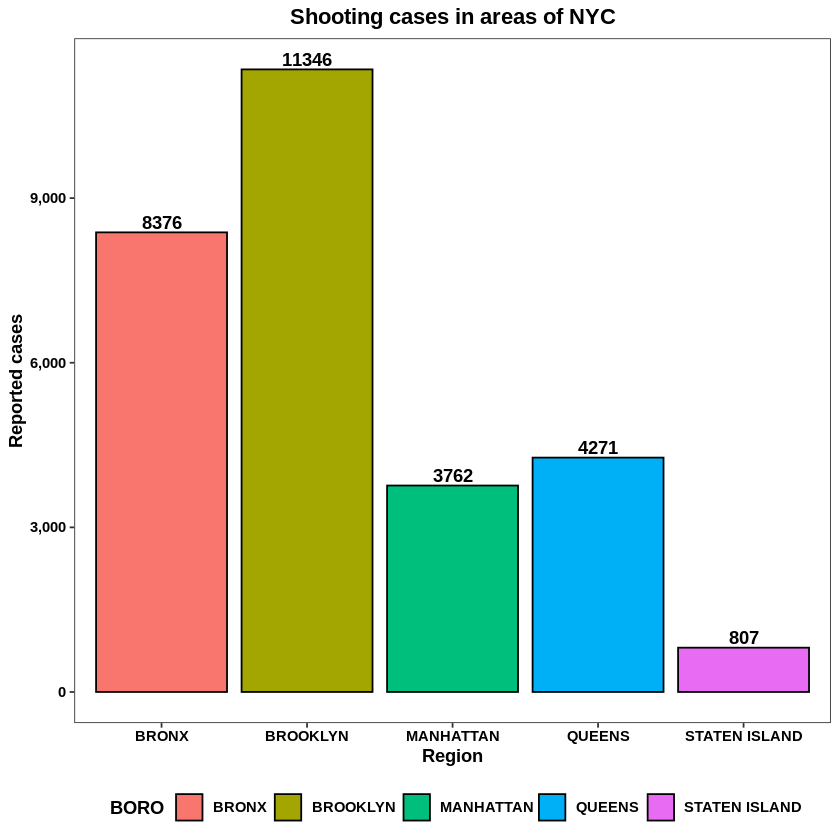

In [11]:
areas %>%
  ggplot(aes(x=BORO, y=Freq, fill=BORO)) +
  geom_bar(stat='identity', color='black') +
  scale_y_continuous(labels = scales::comma_format(accuracy = 2))+
  geom_text(aes(label=Freq),vjust=-0.25,fontface='bold')+
  theme_bw()+
  theme(axis.text = element_text(color='black',face='bold'),
        axis.title = element_text(color='black',face='bold', hjust = 0.5),
        legend.text = element_text(color='black',face='bold'),
        legend.title = element_text(color='black',face='bold', hjust = 0.5),
        legend.position = "bottom",
        plot.title = element_text(color='black', face='bold', hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()
        ) +
  labs(y="Reported cases", x="Region") +
  ggtitle("Shooting cases in areas of NYC")

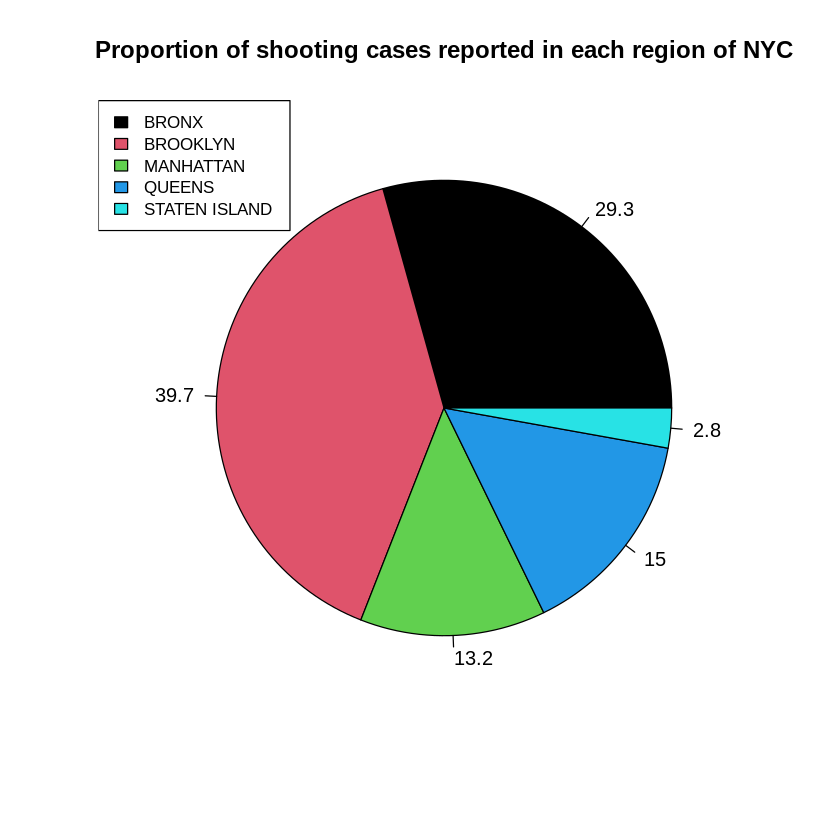

In [12]:
piepercent<- round(100 * areas$Freq / sum(areas$Freq), 1)

pie(
  areas$Freq, labels=piepercent,
  main = "Proportion of shooting cases reported in each region of NYC",
  angle=45,
  col=areas$BORO
)
legend(
  "topleft",
  c("BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"),
  cex = 0.85,
  fill=areas$BORO
)

### Trend in reported incidents

- Line plot to represent the monthly and daily incidents reported

In [13]:
months <- subset(data, select=c(OCCUR_DATE))
month_df <- as.data.frame(table(months))

month_order <- c(
  'January', 'February', 'March', 'April', 'May', 'June', 'July',
  'August', 'September', 'October', 'November', 'December'
)
month_df <- month_df %>%
  mutate(OCCUR_DATE = factor(OCCUR_DATE, levels = month_order)) %>%
  arrange(OCCUR_DATE)

head(month_df)

,OCCUR_DATE,Freq
,<fct>,<int>
1,January,1809
2,February,1444
3,March,1797
4,April,2068
5,May,2682
6,June,2959


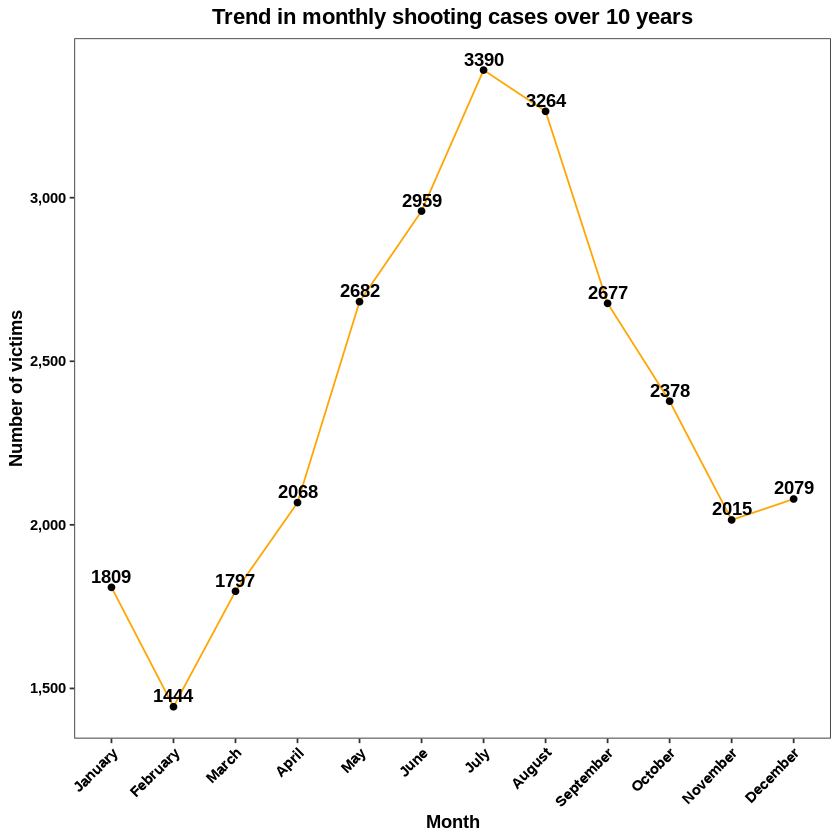

In [14]:
month_df %>%
  ggplot(aes(x=OCCUR_DATE, y=Freq)) +
  geom_line(color='orange', group=1) +
  geom_point(mapping=aes(x=OCCUR_DATE, y=Freq)) +
  scale_y_continuous(labels = scales::comma_format(accuracy = 2))+
  geom_text(aes(label=Freq),vjust=-0.35,fontface='bold')+
  theme_bw()+
  theme(axis.text = element_text(color='black',face='bold'),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_text(color='black',face='bold', hjust = 0.5),
        legend.text = element_text(color='black',face='bold'),
        legend.title = element_text(color='black',face='bold', hjust = 0.5),
        plot.title=element_text(color='black', face='bold', hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()
        ) +
  labs(y="Number of victims", x="Month") +
  ggtitle("Trend in monthly shooting cases over 10 years")

In [15]:
time <- subset(data, select=c(OCCUR_TIME))
time_df <- as.data.frame(table(time))

time_order <- c('Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Midnight')
time_df <- time_df %>%
  mutate(OCCUR_TIME = factor(OCCUR_TIME, levels = time_order)) %>%
  arrange(OCCUR_TIME)

head(time_df)

,OCCUR_TIME,Freq
,<fct>,<int>
1,Early Morning,2860
2,Morning,1223
3,Afternoon,4044
4,Evening,5747
5,Night,6735
6,Midnight,7953


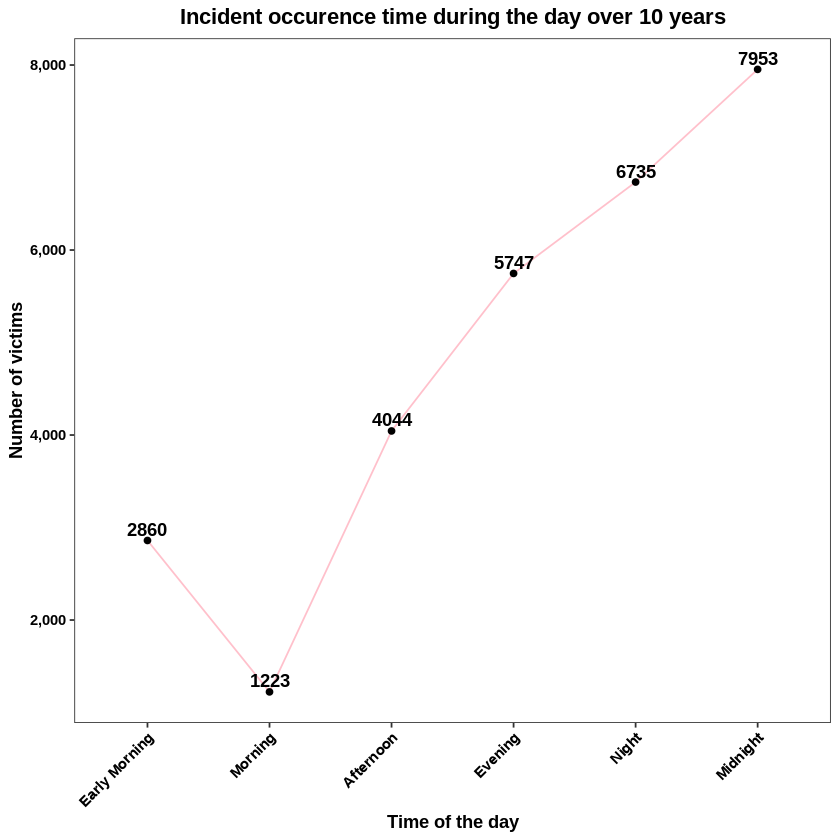

In [16]:
time_df %>%
  ggplot(aes(x=OCCUR_TIME, y=Freq)) +
  geom_line(color='pink', group=1) +
  geom_point(mapping=aes(x=OCCUR_TIME, y=Freq)) +
  scale_y_continuous(labels = scales::comma_format(accuracy = 2))+
  geom_text(aes(label=Freq),vjust=-0.35,fontface='bold')+
  theme_bw()+
  theme(axis.text = element_text(color='black',face='bold'),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_text(color='black',face='bold', hjust = 0.5),
        legend.text = element_text(color='black',face='bold'),
        legend.title = element_text(color='black',face='bold', hjust = 0.5),
        plot.title=element_text(color='black', face='bold', hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()
        ) +
  labs(y="Number of victims", x="Time of the day") +
  ggtitle("Incident occurence time during the day over 10 years")

### Age group analysis

- Bar plot to obtain the number of victims in age group
- Radial plot to compare each age group values and compare their ratios

In [17]:
age_groups <- subset(data, select=c(VIC_AGE_GROUP))
age_df <- as.data.frame(table(age_groups))
age_df <- filter(age_df, VIC_AGE_GROUP!='1022' & VIC_AGE_GROUP!='UNKNOWN')
head(age_df)

,VIC_AGE_GROUP,Freq
,<fct>,<int>
1,0-18,2954
2,18-25,10384
3,25-45,12973
4,45-65,1981
5,65-100,205


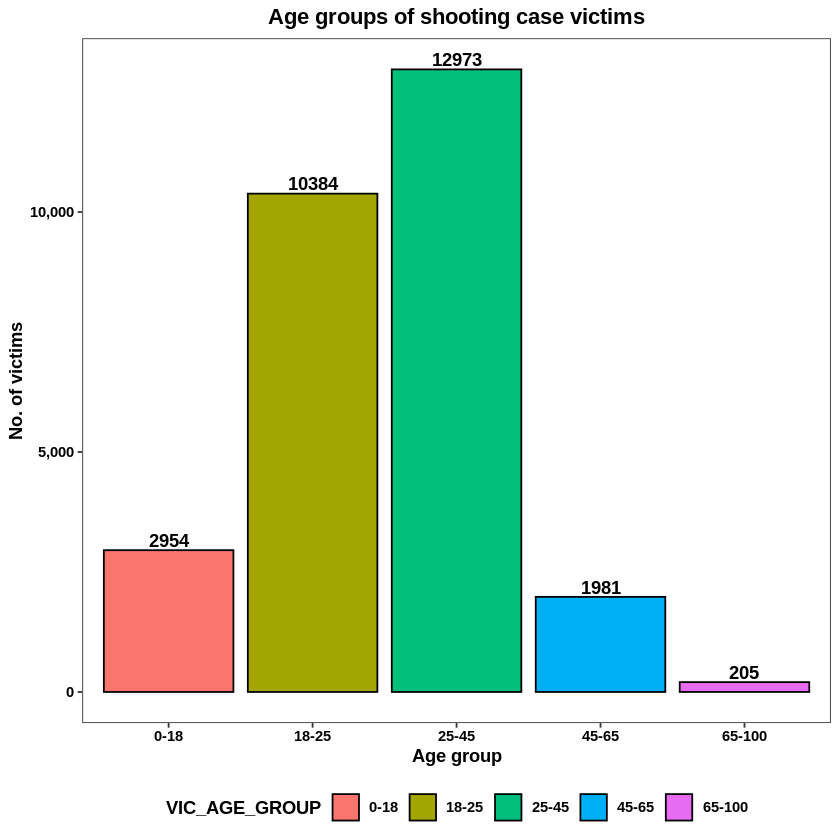

In [18]:
age_df %>%
  ggplot(aes(x=VIC_AGE_GROUP, y=Freq, fill=VIC_AGE_GROUP)) +
  geom_bar(stat='identity', color='black') +
  scale_y_continuous(labels = scales::comma_format(accuracy = 2))+
  geom_text(aes(label=Freq),vjust=-0.25,fontface='bold')+
  theme_bw()+
  theme(axis.text = element_text(color='black',face='bold'),
        axis.title = element_text(color='black',face='bold', hjust = 0.5),
        legend.text = element_text(color='black',face='bold'),
        legend.title = element_text(color='black',face='bold', hjust = 0.5),
        legend.position = "bottom",
        plot.title=element_text(color='black', face='bold', hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()
        ) +
  labs(y="No. of victims", x="Age group") +
  ggtitle("Age groups of shooting case victims")

In [19]:
max_val <- max(age_df$Freq)
min_val <- 0

# Create the radar plot dataframe
radar_df <- rbind(
  rep(max_val, nrow(age_df)),
  rep(min_val, nrow(age_df)),
  age_df$Freq
)
colnames(radar_df) <- age_df$VIC_AGE_GROUP
radar_df <- as.data.frame(radar_df)
head(radar_df)

,0-18,18-25,25-45,45-65,65-100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12973,12973,12973,12973,12973
2,0,0,0,0,0
3,2954,10384,12973,1981,205


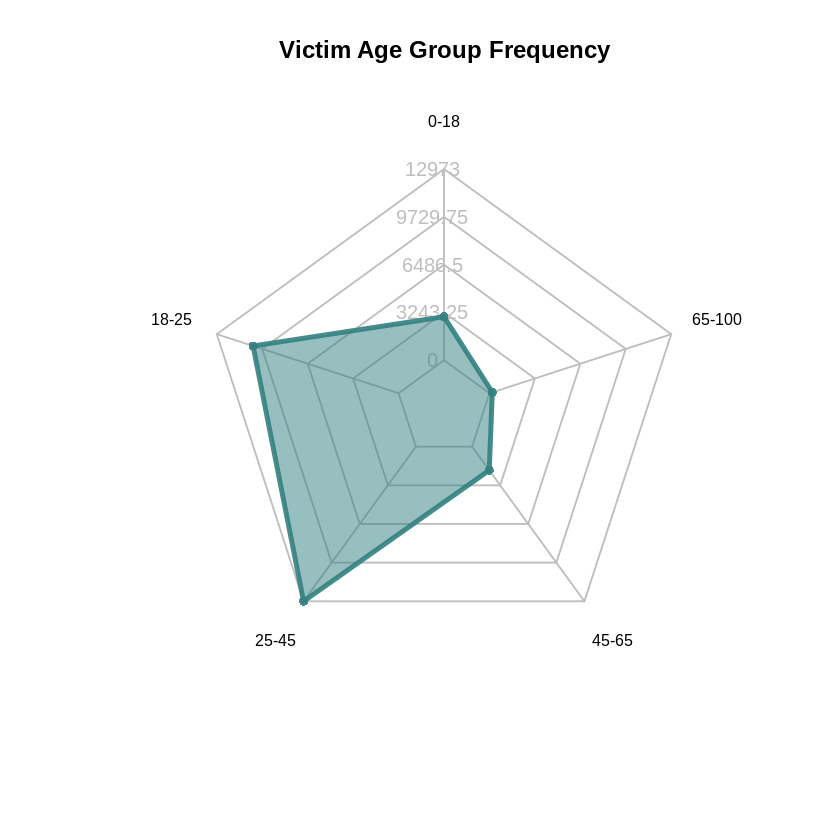

In [20]:
radarchart(
  radar_df, axistype = 1,
  pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5), plwd = 4,
  cglcol = 'grey', cglty = 1, axislabcol = 'grey',
  caxislabels = seq(0, max_val, max_val / 4), cglwd = 1.5,
  vlcex = 0.8, title = "Victim Age Group Frequency"
)

### Ethnicity analysis

- Donut plot to represent the proportion of each ethnicity

In [21]:
victim_race <- subset(data, select=c(VIC_RACE))
race_df <- as.data.frame(table(victim_race))
race_df <- filter(race_df, VIC_RACE!='UNKNOWN')
head(race_df)

,VIC_RACE,Freq
,<fct>,<int>
1,AMERICAN INDIAN/ALASKAN NATIVE,11
2,ASIAN / PACIFIC ISLANDER,440
3,BLACK,20235
4,BLACK HISPANIC,2795
5,WHITE,728
6,WHITE HISPANIC,4283


In [22]:
race_df <- filter(race_df, VIC_RACE!='UNKNOWN', VIC_RACE!='AMERICAN INDIAN/ALASKAN NATIVE')
# Compute percentages
race_df$fraction = race_df$Freq / sum(race_df$Freq)
# Compute the cumulative percentages (top of each rectangle)
race_df$ymax = cumsum(race_df$fraction)
# Compute the bottom of each rectangle
race_df$ymin = c(0, head(race_df$ymax, n=-1))

View(race_df)

VIC_RACE,Freq,fraction,ymax,ymin
<fct>,<int>,<dbl>,<dbl>,<dbl>
ASIAN / PACIFIC ISLANDER,440,0.0154489,0.0154489,0.0000000
BLACK,20235,0.7104736,0.7259225,0.0154489
BLACK HISPANIC,2795,0.0981356,0.8240581,0.7259225
WHITE,728,0.0255609,0.8496190,0.8240581
WHITE HISPANIC,4283,0.1503810,1.0000000,0.8496190


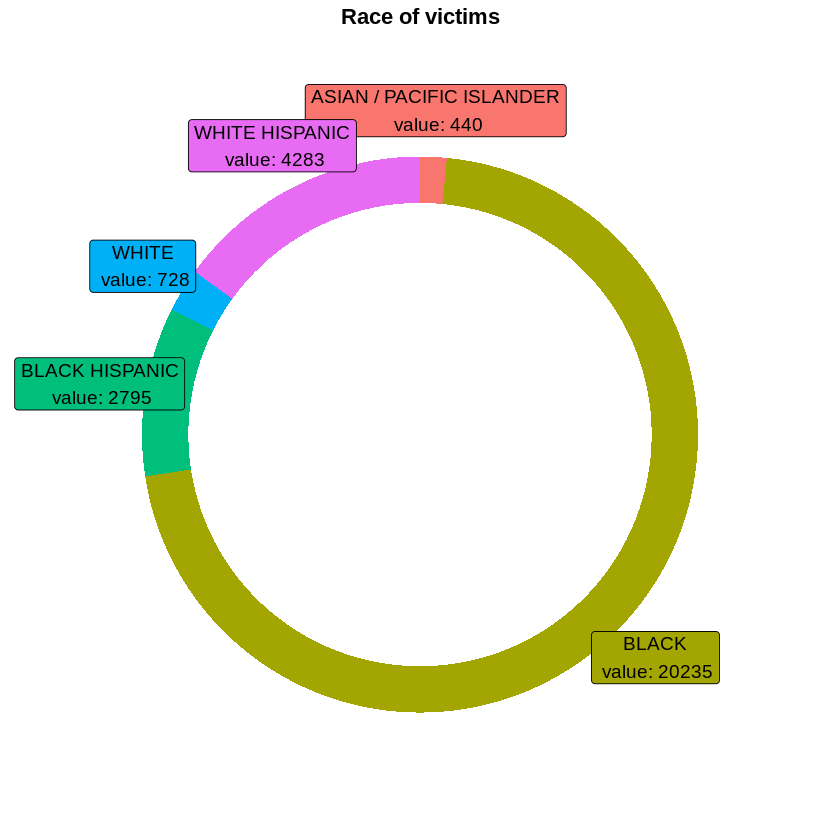

In [23]:
race_df$label <- paste0(race_df$VIC_RACE, "\n value: ", race_df$Freq)
race_df$labelPosition <- (race_df$ymax + race_df$ymin) / 2

# Make the plot
ggplot(race_df, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=VIC_RACE)) +
  geom_rect() +
  # geom_text( x=2, aes(y=labelPosition, label=label, color=VIC_RACE), size=6) +
  geom_label(x=5, aes(y=labelPosition, label=label), size=4) +
  coord_polar(theta="y") +
  xlim(c(-2, 5)) +
  theme_void() +
  theme(legend.position = "none") +
  ggtitle("Race of victims") +
  theme(plot.title=element_text(color='black', face='bold', hjust = 0.5))

### Incidents reported in each locality

Each region of NYC has well demarcated localities: commercial, dwelling, parking lot, playgroun, etc. The objective here is to compare the number of incidents reported in each of these localities in each region as a bar plot. To visualize the data as a bar plot, the data was wrangled as explained below:

1. **Enrich raw data**- aggregation of 'BORO' and 'LOC_CLASSFCTN_DESC' columns
2. **Structure the data**- represent the data as a pivot table indexed by 'BORO' and having 'LOC_CLASSFCTN_DESC' as the column values
3. **Selection**- drop the rows and columns that add little to no value

In [24]:
region_loc <- data %>% drop_na()
region_loc_df <- region_loc %>%
  group_by(BORO, LOC_CLASSFCTN_DESC) %>%
  summarise(Frequency = n()) %>%
  arrange(BORO, desc(Frequency))
region_loc_df <- filter(region_loc_df, LOC_CLASSFCTN_DESC!='OTHER')

View(region_loc_df)

`summarise()` has grouped output by 'BORO'. You can override using the
`.groups` argument.


BORO,LOC_CLASSFCTN_DESC,Frequency
<chr>,<chr>,<int>
BRONX,STREET,132
BRONX,HOUSING,116
BRONX,DWELLING,62
BRONX,COMMERCIAL,47
BRONX,PARKING LOT,2
BROOKLYN,HOUSING,188
BROOKLYN,DWELLING,87
BROOKLYN,STREET,81
BROOKLYN,COMMERCIAL,64


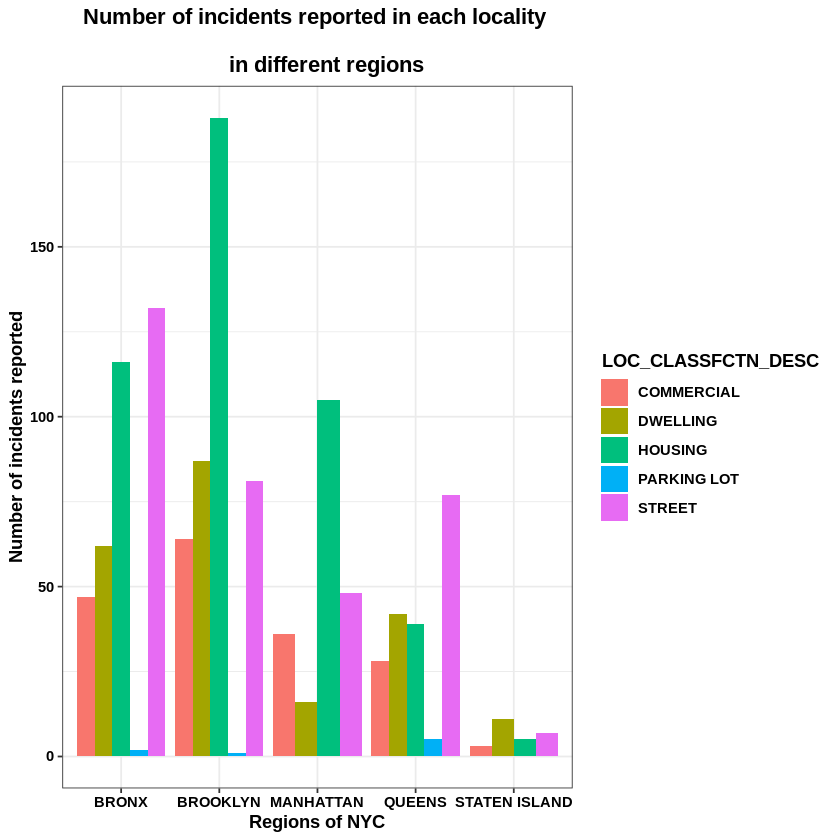

In [25]:
# increase width of x axis and
ggplot(region_loc_df, aes(x = BORO, y = Frequency, fill = LOC_CLASSFCTN_DESC)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(labels = scales::comma_format(accuracy = 1))+
  #geom_text(aes(label=Frequency),vjust=-0.25,fontface='bold')+
  theme_bw()+
  theme(axis.text = element_text(color='black',face='bold'),
        axis.title = element_text(color='black',face='bold', hjust = 0.5),
        #axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        legend.text = element_text(color='black',face='bold'),
        legend.title = element_text(color='black',face='bold', hjust = 0.5),
        plot.title=element_text(color='black', face='bold', hjust = 0.5),
        ) +
  labs(y="Number of incidents reported", x="Regions of NYC") +
  ggtitle("Number of incidents reported in each locality \n
   in different regions")

### Gender wise representation of each age group

- Stacked bar plot representing the gender of each age group quantitatively

In [26]:
age_gender <- subset(data, select=c(VIC_AGE_GROUP, VIC_SEX))
age_gender_df <- as.data.frame(table(age_gender))
age_gender_df <- filter(age_gender_df, VIC_AGE_GROUP!='UNKNOWN', VIC_AGE_GROUP!='1022', VIC_AGE_GROUP!='65-100', VIC_SEX!='U')

View(age_gender_df)

VIC_AGE_GROUP,VIC_SEX,Freq
<fct>,<fct>,<int>
0-18,F,427
18-25,F,826
25-45,F,1073
45-65,F,366
0-18,M,2527
18-25,M,9554
25-45,M,11898
45-65,M,1615


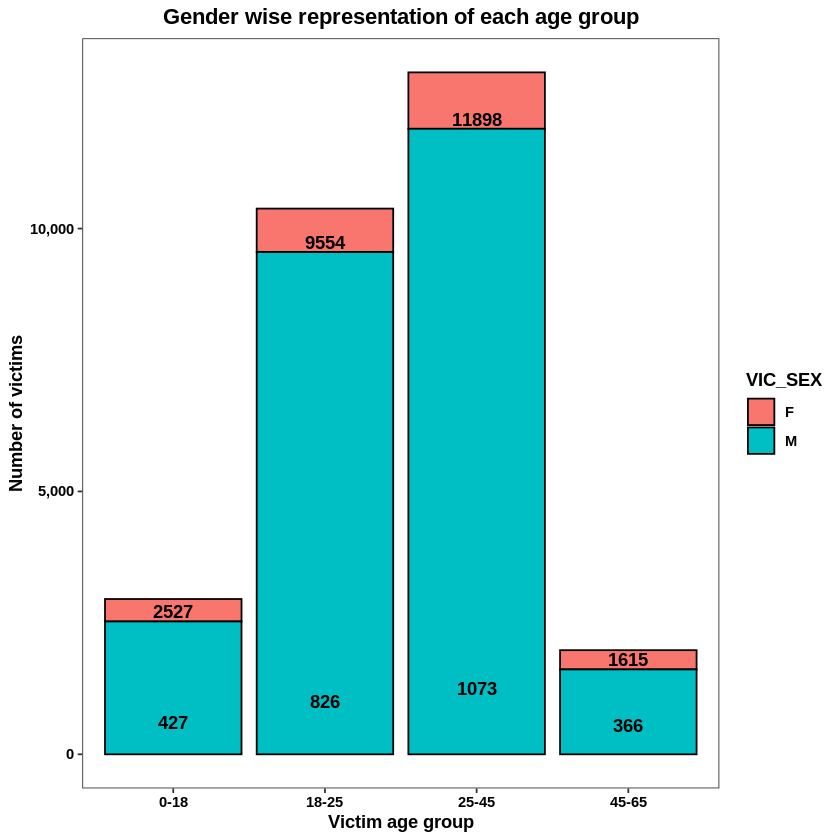

In [27]:
age_gender_df %>%
  ggplot(aes(x = VIC_AGE_GROUP, y = Freq, fill = VIC_SEX)) +
  geom_bar(stat = "identity", color="black") +
  geom_text(aes(label=Freq),vjust=-0.25,fontface='bold')+
  scale_y_continuous(labels = scales::comma_format(accuracy = 2)) +
  theme_bw()+
  theme(axis.text = element_text(color='black',face='bold'),
        axis.title = element_text(color='black',face='bold', hjust = 0.5),
        legend.text = element_text(color='black',face='bold'),
        legend.title = element_text(color='black',face='bold', hjust = 0.5),
        plot.title=element_text(color='black', face='bold', hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()
        ) +
  labs(y="Number of victims", x="Victim age group") +
  ggtitle("Gender wise representation of each age group")

### Bonus plots

- Histogram of the 'PRECINCT' column

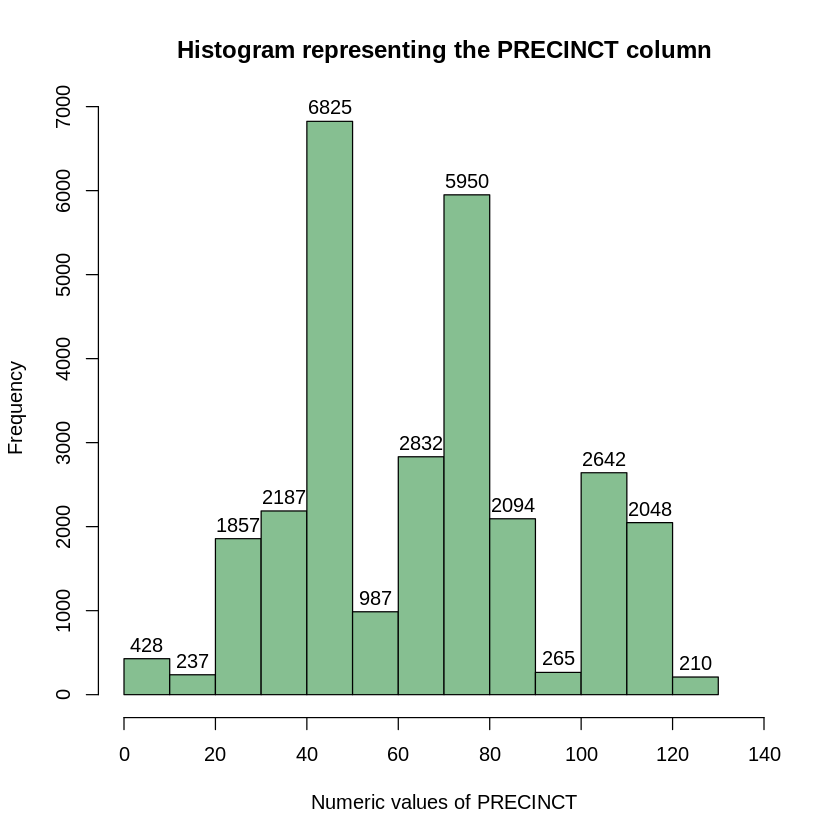

In [28]:
histogram <- hist(
  data$PRECINCT, xlab = "Numeric values of PRECINCT", col = "#86bf91",
  main="Histogram representing the PRECINCT column", border = "black",
  xlim = c(0, 140)
)
text(
  histogram$mids, histogram$counts,
  labels = histogram$counts, adj = c(0.5, -0.5)
)

### Sankey Diagram

- Relationship between the **LOC_CLASSFCTN_DESC** and **LOCATION_DESC** columns

In [29]:
locations <- subset(data, select=c(LOC_CLASSFCTN_DESC, LOCATION_DESC))
sankey_df <- as.data.frame(table(locations))
sankey_df <- filter(sankey_df, Freq!=0, LOC_CLASSFCTN_DESC!='OTHER')

colnames(sankey_df)[colnames(sankey_df)=='LOC_CLASSFCTN_DESC'] <- 'Source'
colnames(sankey_df)[colnames(sankey_df)=='LOCATION_DESC'] <- 'Target'
colnames(sankey_df)[colnames(sankey_df)=='Freq'] <- 'Value'

head(sankey_df)

,Source,Target,Value
,<fct>,<fct>,<int>
1,COMMERCIAL,BEAUTY/NAIL SALON,6
2,STREET,BEAUTY/NAIL SALON,8
3,COMMERCIAL,CLUB,40
4,STREET,CLUB,45
5,COMMERCIAL,COMMERCIAL BLDG,6
6,PARKING LOT,COMMERCIAL BLDG,7


In [30]:
# create a node data frame from flows
nodes <- data.frame(
  name=c(as.character(sankey_df$Source),
  as.character(sankey_df$Target)) %>% unique()
)

# With networkD3, connection must be provided using id
sankey_df$IDsource <- match(sankey_df$Source, nodes$name)-1
sankey_df$IDtarget <- match(sankey_df$Target, nodes$name)-1

head(sankey_df)

,Source,Target,Value,IDsource,IDtarget
,<fct>,<fct>,<int>,<dbl>,<dbl>
1,COMMERCIAL,BEAUTY/NAIL SALON,6,0,5
2,STREET,BEAUTY/NAIL SALON,8,1,5
3,COMMERCIAL,CLUB,40,0,6
4,STREET,CLUB,45,1,6
5,COMMERCIAL,COMMERCIAL BLDG,6,0,7
6,PARKING LOT,COMMERCIAL BLDG,7,2,7


In [31]:
# issue with rendering
sankeyNetwork(
  Links = sankey_df, Nodes = nodes, Source = "IDsource",
  Target = "IDtarget", Value = "Value", NodeID = "name",
  sinksRight=FALSE, fontSize = 12
)

HTML widgets cannot be represented in plain text (need html)